In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/train.csv


In [2]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import word_tokenize,sent_tokenize
lem = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [3]:
def text_preprocess(text):
#     clean_text = text.lower()
    clean_text = re.sub('[^A-Za-z ]+', "", text).lower()
    clean_text = re.sub(r'(http|https|pic.)\S+', " ", clean_text)
    clean_words = word_tokenize(clean_text)
    words = set([lem.lemmatize(word) for word in clean_words if not word in stop_words])
    final_text = ' '.join(words)
    return final_text

In [4]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [5]:
train_df["text"] = train_df["text"].apply(text_preprocess)

In [6]:
train_df[train_df["target"] == 0]["text"].values[1]

'love fruit'

In [7]:
train_df[train_df["target"] == 1]["text"].values[1]

'fire forest la near canada ronge sask'

Text(0.5, 0, 'Keywords')

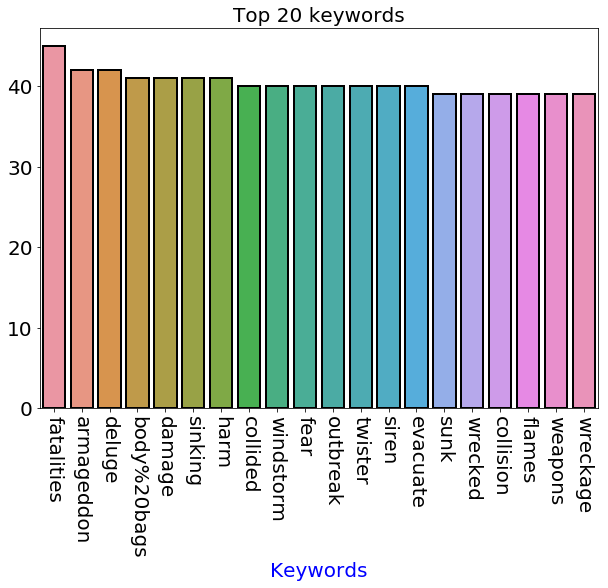

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
keyword=train_df['keyword'].value_counts()[:20]
plt.figure(figsize=(10,7))
sns.barplot(keyword.index,keyword.values,edgecolor=(0,0,0),linewidth=2)
plt.title('Top 20 keywords',fontsize=20)
plt.xticks(fontsize=20,rotation=270)
plt.yticks(fontsize=20)
plt.xlabel('Keywords',fontsize=20,color='blue')

In [9]:
count_vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train_df["text"])

## note that we're NOT using .fit_transform() here. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.
test_vectors = count_vectorizer.transform(test_df["text"])

In [10]:
## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
clf = linear_model.RidgeClassifier()

In [11]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.61465472, 0.52843483, 0.62760675])

In [12]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [13]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

In [14]:
sample_submission["target"] = clf.predict(test_vectors)

In [15]:
sample_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [16]:
sample_submission.to_csv("/kaggle/working/submission.csv", index=False)